**Stock Market Prediction using CNN-LSTM model**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
data = pd.read_csv('Amazon.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [ ]:
data.shape

(6155, 7)

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03
mean,520.556302,526.216132,514.277282,520.429832,520.429832,7.329010e+06
std,857.161696,865.821041,847.270905,856.668492,856.668492,7.149521e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.750000,39.514999,38.104999,38.821251,38.821251,3.579350e+06
50%,92.669998,94.190002,90.750000,92.639999,92.639999,5.470000e+06
75%,528.949982,535.304993,521.950012,529.450012,529.450012,8.294950e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [ ]:

data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


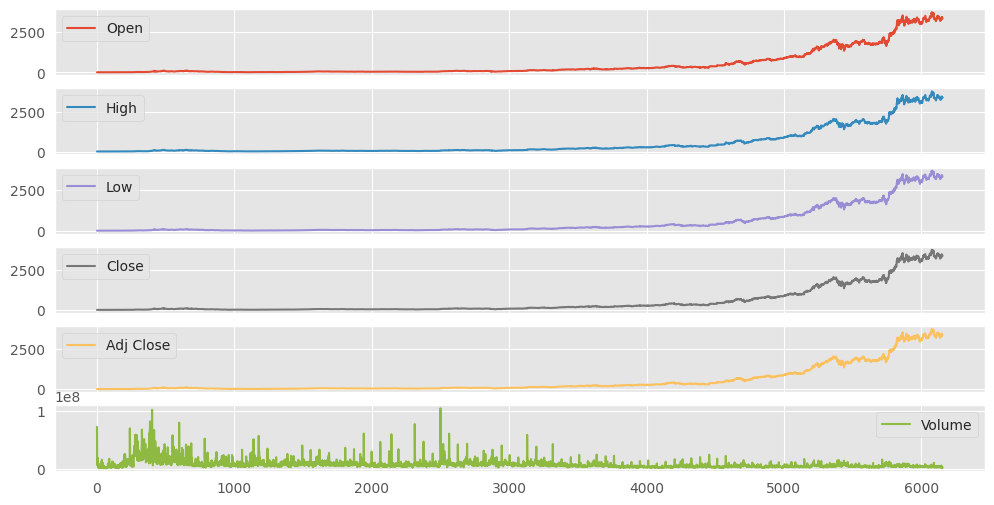

(6155, 7)
43085
            count unique         top freq           mean             std  \
Date         6155   6155  1997-05-15    1            NaN             NaN   
Open       6155.0    NaN         NaN  NaN     520.556302      857.161696   
High       6155.0    NaN         NaN  NaN     526.216132      865.821041   
Low        6155.0    NaN         NaN  NaN     514.277282      847.270905   
Close      6155.0    NaN         NaN  NaN     520.429832      856.668492   
Adj Close  6155.0    NaN         NaN  NaN     520.429832      856.668492   
Volume     6155.0    NaN         NaN  NaN  7329010.12039  7149521.222144   

                min        25%        50%         75%          max  
Date            NaN        NaN        NaN         NaN          NaN  
Open        1.40625      38.75  92.669998  528.949982       3744.0  
High       1.447917  39.514999  94.190002  535.304993  3773.080078  
Low          1.3125  38.104999      90.75  521.950012  3696.790039  
Close      1.395833  38.821251

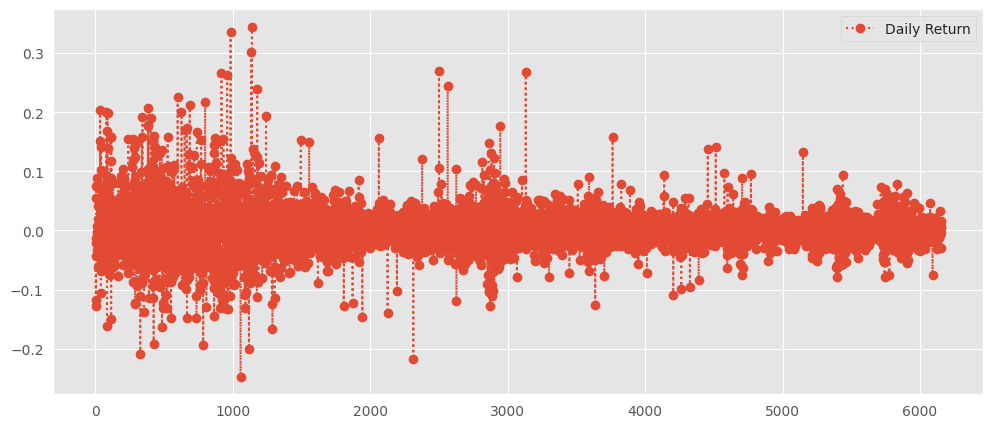

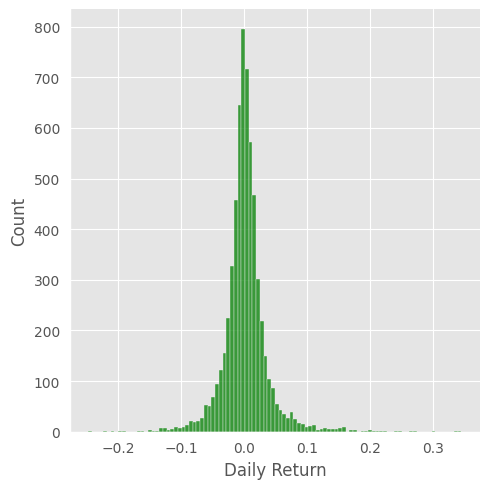

         Date  data_close
0  1997-05-15    1.958333
1  1997-05-16    1.729167
2  1997-05-19    1.708333
3  1997-05-20    1.635417
4  1997-05-21    1.427083
         Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

   MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0             NaN             NaN              NaN           NaN  
1             NaN             NaN              NaN     -0.117021  
2             NaN             NaN              NaN     -0.012049  
3             NaN             NaN              NaN     -0.042683  
4             NaN             NaN       

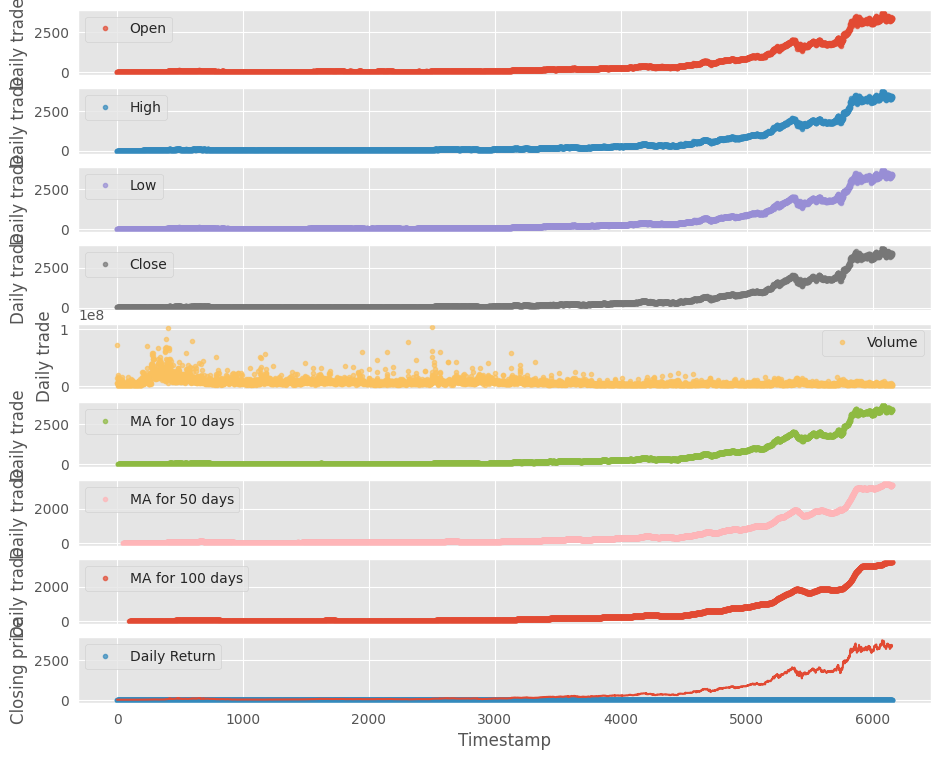

        Adj Close        Close  Daily Return        Date         High  \
0        1.958333     1.958333           NaN  1997-05-15     2.500000   
1        1.729167     1.729167     -0.117021  1997-05-16     1.979167   
2        1.708333     1.708333     -0.012049  1997-05-19     1.770833   
3        1.635417     1.635417     -0.042683  1997-05-20     1.750000   
4        1.427083     1.427083     -0.127389  1997-05-21     1.645833   
...           ...          ...           ...         ...          ...   
6150  3435.010010  3435.010010      0.005842  2021-10-21  3440.280029   
6151  3335.550049  3335.550049     -0.028955  2021-10-22  3429.840088   
6152  3320.370117  3320.370117     -0.004551  2021-10-25  3347.800049   
6153  3376.070068  3376.070068      0.016775  2021-10-26  3416.120117   
6154  3396.189941  3396.189941      0.005960  2021-10-27  3412.000000   

              Low  MA for 10 days  MA for 100 days  MA for 50 days  \
0        1.927083             NaN              NaN   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Plot the data with subplots
data.plot(legend=True, subplots=True, figsize=(12, 6))
plt.show()

# Displaying various data properties
print(data.shape)
print(data.size)
print(data.describe(include='all').T)
print(data.dtypes)
print(data.nunique())

# Moving Average (MA) calculations
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = pd.DataFrame.rolling(data['Close'], ma).mean()

# Calculate daily return percentage
data['Daily Return'] = data['Close'].pct_change()

# Plot the daily return percentage
data['Daily Return'].plot(figsize=(12, 5), legend=True, linestyle=':', marker='o')
plt.show()

# Distribution plot for daily returns
sns.displot(data['Daily Return'].dropna(), bins=100, color='green')
plt.show()

# Combine 'Date' and 'Close' into a new DataFrame
date = pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1 = closing_df1.rename(columns={"Close": "data_close"})
close2 = pd.concat([date, close1], axis=1)
print(close2.head())

# Display first few rows of the data
print(data.head())

# Number of unique values in each column
print(data.nunique())

# Sort DataFrame columns
data = data.sort_index(axis=1, ascending=True)

# Plotting specific columns
cols_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days', 'Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

# Plot closing price
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.show()

# Print the DataFrame
print(data)

# Check for missing values
print(data.isnull().sum())


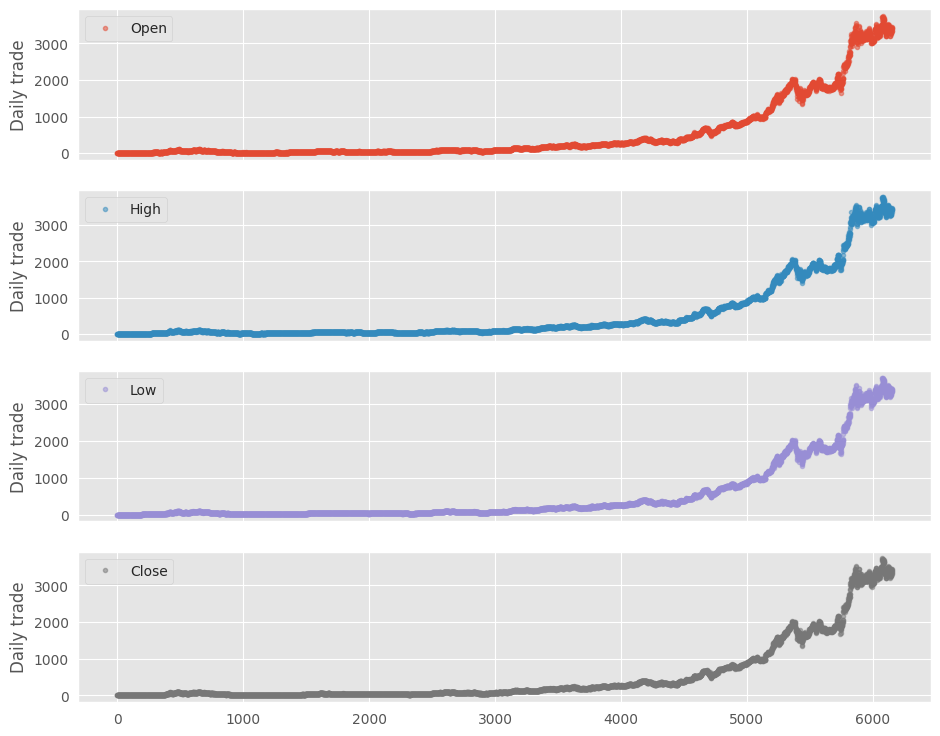

In [ ]:
cols_plot = ['Open', 'High', 'Low', 'Close']

# Plotting specified columns
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

# Show the plot
plt.show()

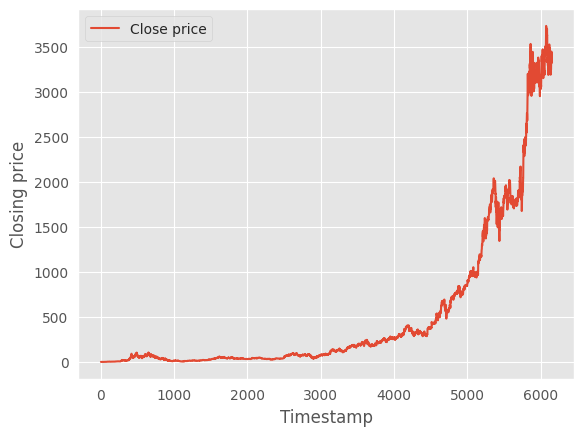

        Adj Close        Close  Daily Return        Date         High  \
0        1.958333     1.958333           NaN  1997-05-15     2.500000   
1        1.729167     1.729167     -0.117021  1997-05-16     1.979167   
2        1.708333     1.708333     -0.012049  1997-05-19     1.770833   
3        1.635417     1.635417     -0.042683  1997-05-20     1.750000   
4        1.427083     1.427083     -0.127389  1997-05-21     1.645833   
...           ...          ...           ...         ...          ...   
6150  3435.010010  3435.010010      0.005842  2021-10-21  3440.280029   
6151  3335.550049  3335.550049     -0.028955  2021-10-22  3429.840088   
6152  3320.370117  3320.370117     -0.004551  2021-10-25  3347.800049   
6153  3376.070068  3376.070068      0.016775  2021-10-26  3416.120117   
6154  3396.189941  3396.189941      0.005960  2021-10-27  3412.000000   

              Low  MA for 10 days  MA for 100 days  MA for 50 days  \
0        1.927083             NaN              NaN   

In [ ]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.legend()
plt.show()

# Assigning the DataFrame to a variable 'df'
df = data
print(df)

# Displaying the descriptive statistics of the DataFrame
print(df.describe().transpose())

Window Length: 20
39/39 [==============================] - 0s 5ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0282
Variance: 0.9210142440571667
R2 Score: 0.918397412439973
Max Error: 0.4199517586874585
Window Length: 30
39/39 [==============================] - 0s 10ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0384
Variance: 0.9302971265814963
R2 Score: 0.929665698750183
Max Error: 0.57251637068778
Window Length: 40
39/39 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0547
Variance: 0.9067754713497631
R2 Score: 0.9065271362982269
Max Error: 0.6417069293161909
Window Length: 50
39/39 [==============================] - 0s 12ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0694
Variance: 0.8731563925386938
R2 Score: 0.8731544129083506
Max Error: 0.6442532177955265
Window Length: 60
39/39 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0425
Variance: 0.9757319715689065
R2 Score: 0.9687544557815801
Max Error: 0.43039634

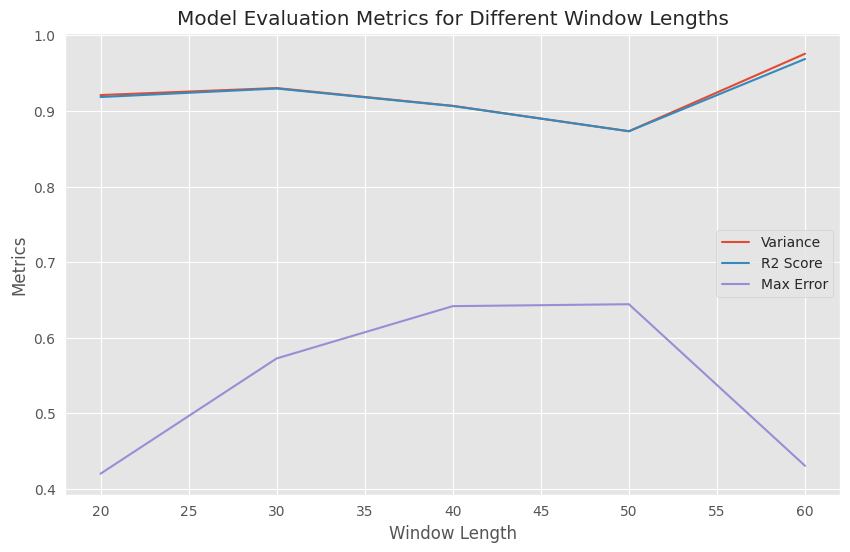

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score, max_error

# Function to create and train the model
def create_and_train_model(window_size):
    X = []
    Y = []
    for i in range(1, len(df) - window_size - 1, 1):
        first = df.iloc[i, df.columns.get_loc('Close')]
        temp = []
        temp2 = []
        for j in range(window_size):
            temp.append((df.iloc[i + j, df.columns.get_loc('Close')] - first) / first)
        temp2.append((df.iloc[i + window_size, df.columns.get_loc('Close')] - first) / first)
        X.append(np.array(temp).reshape(window_size, 1))
        Y.append(np.array(temp2).reshape(1, 1))

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

    train_X = np.array(x_train)
    test_X = np.array(x_test)
    train_Y = np.array(y_train)
    test_Y = np.array(y_test)

    train_X = train_X.reshape(train_X.shape[0], 1, window_size, 1)
    test_X = test_X.reshape(test_X.shape[0], 1, window_size, 1)

    model = tf.keras.Sequential()

    # CNN layers
    model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(None, window_size, 1))))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))

    # LSTM layers
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(100, return_sequences=False)))
    model.add(Dropout(0.5))

    # Final layers
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

    history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=40, batch_size=40, verbose=0, shuffle=True)

    model.evaluate(test_X, test_Y)

    # Predict probabilities for test set
    yhat_probs = model.predict(test_X, verbose=0)
    # Reduce to 1d array
    yhat_probs = yhat_probs[:, 0]

    var = explained_variance_score(test_Y.reshape(-1, 1), yhat_probs)
    r2 = r2_score(test_Y.reshape(-1, 1), yhat_probs)
    var2 = max_error(test_Y.reshape(-1, 1), yhat_probs)

    return var, r2, var2 , model

# List of window lengths to iterate over
window_lengths = [20, 30, 40, 50, 60]

# Dictionary to store metrics for each window length
metrics = {}

# Iterate over window lengths and train models
for window_length in window_lengths:
    print(f"Window Length: {window_length}")
    var, r2, var2, model = create_and_train_model(window_length)
    print(f"Variance: {var}")
    print(f"R2 Score: {r2}")
    print(f"Max Error: {var2}")
    metrics[window_length] = {'Variance': var, 'R2 Score': r2, 'Max Error': var2}

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(window_lengths, [metrics[length]['Variance'] for length in window_lengths], label='Variance')
plt.plot(window_lengths, [metrics[length]['R2 Score'] for length in window_lengths], label='R2 Score')
plt.plot(window_lengths, [metrics[length]['Max Error'] for length in window_lengths], label='Max Error')
plt.xlabel("Window Length")
plt.ylabel("Metrics")
plt.title("Model Evaluation Metrics for Different Window Lengths")
plt.legend()
plt.show()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_28 (TimeD  (None, 1, 60, 64)         256       
 istributed)                                                     
                                                                 
 time_distributed_29 (TimeD  (None, 1, 30, 64)         0         
 istributed)                                                     
                                                                 
 time_distributed_30 (TimeD  (None, 1, 28, 128)        24704     
 istributed)                                                     
                                                                 
 time_distributed_31 (TimeD  (None, 1, 14, 128)        0         
 istributed)                                                     
                                                                 
 time_distributed_32 (TimeD  (None, 1, 12, 64)        

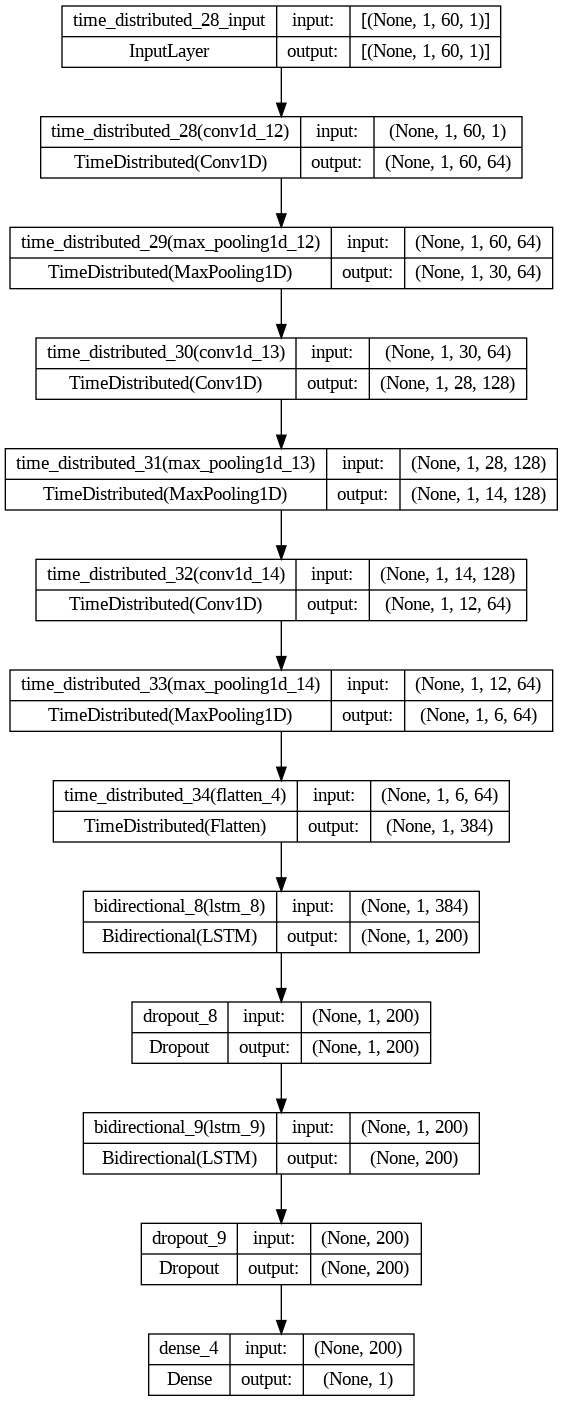

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
#using svm to predict stock
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing
from sklearn.metrics import classification_report

In [ ]:

def get_x_and_y(price, window_length=7, predict_day_length=1):
    '''get train and test set
    every time get window from price and
    '''
    # Number of features (assuming price has columns)
    m = len(price.columns)
    # Number of samples (number of windows we can extract)
    n = len(price) - window_length
    # Total number of features for each window
    m = window_length * m

    # Initialize arrays for x (features) and y (labels)
    x = np.ones((n, m))
    y = np.ones((n, 1))

    for i in range(len(price) - window_length):
        # Extract a window of data
        ans = [price.iloc[j].tolist() for j in range(i, i + window_length)]
        ans = np.array(ans).flatten()
        x[i] = ans
        # Determine the label based on the closing price movement
        y[i] = 1 if price['Close'].iloc[i + window_length + predict_day_length - 1] - price['Close'].iloc[i + window_length - 1] > 0 else 0

    return x, y


In [ ]:


def get_x_and_y(price, window_length, predict_day_length):
    n_samples = len(price) - window_length - predict_day_length + 1
    x = np.zeros((n_samples, window_length))
    y = np.zeros((n_samples,))

    for i in range(n_samples):
        # Create the window for x
        x[i] = price['Close'].iloc[i:i+window_length].values
        # Create the label for y
        y[i] = 1 if price['Close'].iloc[i + window_length + predict_day_length - 1] - price['Close'].iloc[i + window_length - 1] > 0 else 0

    return x, y




In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the function to get features and labels
def get_x_and_y(price, window_length, predict_day_length):
    n_samples = len(price) - window_length - predict_day_length + 1
    x = np.zeros((n_samples, window_length))
    y = np.zeros((n_samples,))

    for i in range(n_samples):
        x[i] = price['Close'].iloc[i:i+window_length].values
        y[i] = 1 if price['Close'].iloc[i + window_length + predict_day_length - 1] - price['Close'].iloc[i + window_length - 1] > 0 else 0

    return x, y

# Define the function to train and test the model
def train_and_test(price, window_length, accurarys, reports):
    x, y = get_x_and_y(price, window_length, predict_day_length=1)
    y = y.flatten()

    # Scale the features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=233)

    for kernel_arg in ['rbf', 'poly', 'linear']:
        clf = svm.SVC(kernel=kernel_arg, max_iter=5000)
        clf.fit(x_train, y_train)
        y_predict = clf.predict(x_test)

        accuracy = clf.score(x_test, y_test)
        report = classification_report(y_test, y_predict, target_names=['drop', 'up'])

        if window_length in accurarys:
            accurarys[window_length].append(accuracy)
            reports[window_length].append(report)
        else:
            accurarys[window_length] = [accuracy]
            reports[window_length] = [report]

        print('The Accuracy of %s : %f' % (kernel_arg, accuracy))
        print(report)

# Example usage
window_lengths = [20, 30, 40, 50, 60]
accurarys = {}
reports = {}

# Assuming df is your DataFrame and contains the 'Close' column among others
for window_length in window_lengths:
    print(f"Window Length: {window_length}")
    train_and_test(df, window_length, accurarys, reports)


Window Length: 20
The Accuracy of rbf : 0.519557
              precision    recall  f1-score   support

        drop       0.52      0.66      0.58       767
          up       0.53      0.38      0.44       767

    accuracy                           0.52      1534
   macro avg       0.52      0.52      0.51      1534
weighted avg       0.52      0.52      0.51      1534



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.500000
              precision    recall  f1-score   support

        drop       0.50      0.00      0.01       767
          up       0.50      1.00      0.67       767

    accuracy                           0.50      1534
   macro avg       0.50      0.50      0.34      1534
weighted avg       0.50      0.50      0.34      1534



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accuracy of linear : 0.500000
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       767
          up       0.50      1.00      0.67       767

    accuracy                           0.50      1534
   macro avg       0.25      0.50      0.33      1534
weighted avg       0.25      0.50      0.33      1534

Window Length: 30
The Accuracy of rbf : 0.515013
              precision    recall  f1-score   support

        drop       0.51      0.75      0.60       755
          up       0.54      0.29      0.38       777

    accuracy                           0.52      1532
   macro avg       0.52      0.52      0.49      1532
weighted avg       0.52      0.52      0.49      1532



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.488903
              precision    recall  f1-score   support

        drop       0.49      0.93      0.64       755
          up       0.47      0.06      0.10       777

    accuracy                           0.49      1532
   macro avg       0.48      0.50      0.37      1532
weighted avg       0.48      0.49      0.37      1532



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accuracy of linear : 0.507180
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       755
          up       0.51      1.00      0.67       777

    accuracy                           0.51      1532
   macro avg       0.25      0.50      0.34      1532
weighted avg       0.26      0.51      0.34      1532

Window Length: 40
The Accuracy of rbf : 0.528450
              precision    recall  f1-score   support

        drop       0.51      0.65      0.57       749
          up       0.55      0.41      0.47       780

    accuracy                           0.53      1529
   macro avg       0.53      0.53      0.52      1529
weighted avg       0.53      0.53      0.52      1529



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.509483
              precision    recall  f1-score   support

        drop       0.48      0.01      0.03       749
          up       0.51      0.99      0.67       780

    accuracy                           0.51      1529
   macro avg       0.49      0.50      0.35      1529
weighted avg       0.49      0.51      0.36      1529



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accuracy of linear : 0.510137
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       749
          up       0.51      1.00      0.68       780

    accuracy                           0.51      1529
   macro avg       0.26      0.50      0.34      1529
weighted avg       0.26      0.51      0.34      1529

Window Length: 50
The Accuracy of rbf : 0.512115
              precision    recall  f1-score   support

        drop       0.50      0.63      0.56       753
          up       0.52      0.40      0.45       774

    accuracy                           0.51      1527
   macro avg       0.51      0.51      0.51      1527
weighted avg       0.51      0.51      0.51      1527



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.510151
              precision    recall  f1-score   support

        drop       0.59      0.02      0.04       753
          up       0.51      0.98      0.67       774

    accuracy                           0.51      1527
   macro avg       0.55      0.50      0.36      1527
weighted avg       0.55      0.51      0.36      1527



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accuracy of linear : 0.506876
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       753
          up       0.51      1.00      0.67       774

    accuracy                           0.51      1527
   macro avg       0.25      0.50      0.34      1527
weighted avg       0.26      0.51      0.34      1527

Window Length: 60
The Accuracy of rbf : 0.504593
              precision    recall  f1-score   support

        drop       0.49      0.66      0.56       732
          up       0.53      0.36      0.43       792

    accuracy                           0.50      1524
   macro avg       0.51      0.51      0.50      1524
weighted avg       0.51      0.50      0.49      1524



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.482283
              precision    recall  f1-score   support

        drop       0.48      0.97      0.64       732
          up       0.53      0.04      0.07       792

    accuracy                           0.48      1524
   macro avg       0.50      0.50      0.35      1524
weighted avg       0.51      0.48      0.34      1524



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of linear : 0.519029
              precision    recall  f1-score   support

        drop       0.46      0.01      0.02       732
          up       0.52      0.99      0.68       792

    accuracy                           0.52      1524
   macro avg       0.49      0.50      0.35      1524
weighted avg       0.49      0.52      0.36      1524



In [ ]:
for l in window_lengths:
    print('window_length:',l)
    train_and_test(data,l,accurarys,reports)

window_length: 20
The Accuracy of rbf : 0.519557
              precision    recall  f1-score   support

        drop       0.52      0.66      0.58       767
          up       0.53      0.38      0.44       767

    accuracy                           0.52      1534
   macro avg       0.52      0.52      0.51      1534
weighted avg       0.52      0.52      0.51      1534



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.500000
              precision    recall  f1-score   support

        drop       0.50      0.00      0.01       767
          up       0.50      1.00      0.67       767

    accuracy                           0.50      1534
   macro avg       0.50      0.50      0.34      1534
weighted avg       0.50      0.50      0.34      1534



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accuracy of linear : 0.500000
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       767
          up       0.50      1.00      0.67       767

    accuracy                           0.50      1534
   macro avg       0.25      0.50      0.33      1534
weighted avg       0.25      0.50      0.33      1534

window_length: 30
The Accuracy of rbf : 0.515013
              precision    recall  f1-score   support

        drop       0.51      0.75      0.60       755
          up       0.54      0.29      0.38       777

    accuracy                           0.52      1532
   macro avg       0.52      0.52      0.49      1532
weighted avg       0.52      0.52      0.49      1532



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.488903
              precision    recall  f1-score   support

        drop       0.49      0.93      0.64       755
          up       0.47      0.06      0.10       777

    accuracy                           0.49      1532
   macro avg       0.48      0.50      0.37      1532
weighted avg       0.48      0.49      0.37      1532



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accuracy of linear : 0.507180
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       755
          up       0.51      1.00      0.67       777

    accuracy                           0.51      1532
   macro avg       0.25      0.50      0.34      1532
weighted avg       0.26      0.51      0.34      1532

window_length: 40
The Accuracy of rbf : 0.528450
              precision    recall  f1-score   support

        drop       0.51      0.65      0.57       749
          up       0.55      0.41      0.47       780

    accuracy                           0.53      1529
   macro avg       0.53      0.53      0.52      1529
weighted avg       0.53      0.53      0.52      1529



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.509483
              precision    recall  f1-score   support

        drop       0.48      0.01      0.03       749
          up       0.51      0.99      0.67       780

    accuracy                           0.51      1529
   macro avg       0.49      0.50      0.35      1529
weighted avg       0.49      0.51      0.36      1529



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accuracy of linear : 0.510137
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       749
          up       0.51      1.00      0.68       780

    accuracy                           0.51      1529
   macro avg       0.26      0.50      0.34      1529
weighted avg       0.26      0.51      0.34      1529

window_length: 50
The Accuracy of rbf : 0.512115
              precision    recall  f1-score   support

        drop       0.50      0.63      0.56       753
          up       0.52      0.40      0.45       774

    accuracy                           0.51      1527
   macro avg       0.51      0.51      0.51      1527
weighted avg       0.51      0.51      0.51      1527



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.510151
              precision    recall  f1-score   support

        drop       0.59      0.02      0.04       753
          up       0.51      0.98      0.67       774

    accuracy                           0.51      1527
   macro avg       0.55      0.50      0.36      1527
weighted avg       0.55      0.51      0.36      1527



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accuracy of linear : 0.506876
              precision    recall  f1-score   support

        drop       0.00      0.00      0.00       753
          up       0.51      1.00      0.67       774

    accuracy                           0.51      1527
   macro avg       0.25      0.50      0.34      1527
weighted avg       0.26      0.51      0.34      1527

window_length: 60
The Accuracy of rbf : 0.504593
              precision    recall  f1-score   support

        drop       0.49      0.66      0.56       732
          up       0.53      0.36      0.43       792

    accuracy                           0.50      1524
   macro avg       0.51      0.51      0.50      1524
weighted avg       0.51      0.50      0.49      1524



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of poly : 0.482283
              precision    recall  f1-score   support

        drop       0.48      0.97      0.64       732
          up       0.53      0.04      0.07       792

    accuracy                           0.48      1524
   macro avg       0.50      0.50      0.35      1524
weighted avg       0.51      0.48      0.34      1524



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The Accuracy of linear : 0.519029
              precision    recall  f1-score   support

        drop       0.46      0.01      0.02       732
          up       0.52      0.99      0.68       792

    accuracy                           0.52      1524
   macro avg       0.49      0.50      0.35      1524
weighted avg       0.49      0.52      0.36      1524



In [ ]:
data

,Adj Close,Close,Daily Return,Date,High,Low,MA for 10 days,MA for 100 days,MA for 50 days,Open,Volume
0,1.958333,1.958333,NaN,1997-05-15,2.500000,1.927083,NaN,NaN,NaN,2.437500,72156000
1,1.729167,1.729167,-0.117021,1997-05-16,1.979167,1.708333,NaN,NaN,NaN,1.968750,14700000
2,1.708333,1.708333,-0.012049,1997-05-19,1.770833,1.625000,NaN,NaN,NaN,1.760417,6106800
3,1.635417,1.635417,-0.042683,1997-05-20,1.750000,1.635417,NaN,NaN,NaN,1.729167,5467200
4,1.427083,1.427083,-0.127389,1997-05-21,1.645833,1.375000,NaN,NaN,NaN,1.635417,18853200
...,...,...,...,...,...,...,...,...,...,...,...
6150,3435.010010,3435.010010,0.005842,2021-10-21,3440.280029,3403.000000,3351.637036,3414.373198,3358.037007,3414.250000,1881400
6151,3335.550049,3335.550049,-0.028955,2021-10-22,3429.840088,3331.300049,3356.330029,3415.388799,3358.678008,3421.000000,3133800
6152,3320.370117,3320.370117,-0.004551,2021-10-25,3347.800049,3297.699951,3363.737036,3416.722400,3359.206011,3335.000000,2226000
6153,3376.070068,3376.070068,0.016775,2021-10-26,3416.120117,3343.979980,3376.611035,3418.420901,3360.747612,3349.510010,2693700


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Assuming `data` is your DataFrame
# Replace 'Close' with the correct column name if necessary
data = df  # Ensure df is defined as your dataset

accuracies = {}
reports = {}

def get_x_and_y(price, window_length, predict_day_length):
    n_samples = len(price) - window_length - predict_day_length + 1
    x = np.zeros((n_samples, window_length))
    y = np.zeros((n_samples,))

    for i in range(n_samples):
        x[i] = price['Close'].iloc[i:i + window_length].values
        y[i] = 1 if price['Close'].iloc[i + window_length + predict_day_length - 1] - price['Close'].iloc[i + window_length - 1] > 0 else 0

    return x, y

def train_and_test_rf(price, window_length, accuracies, reports):
    x, y = get_x_and_y(price, window_length, predict_day_length=1)
    y = y.flatten()
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=233)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    accuracy = clf.score(x_test, y_test)
    report = classification_report(y_test, y_predict, target_names=['drop', 'up'])

    if window_length in accuracies:
        accuracies[window_length].append(accuracy)
        reports[window_length].append(report)
    else:
        accuracies[window_length] = [accuracy]
        reports[window_length] = [report]

    print('The Accuracy of Random Forest: %f' % (accuracy))
    print(report)

window_lengths = [20, 30, 40, 50, 60]

for l in window_lengths:
    print('window_length:', l)
    train_and_test_rf(data, l, accuracies, reports)


window_length: 20
The Accuracy of Random Forest: 0.473924
              precision    recall  f1-score   support

        drop       0.47      0.45      0.46       767
          up       0.48      0.50      0.49       767

    accuracy                           0.47      1534
   macro avg       0.47      0.47      0.47      1534
weighted avg       0.47      0.47      0.47      1534

window_length: 30
The Accuracy of Random Forest: 0.489556
              precision    recall  f1-score   support

        drop       0.48      0.46      0.47       755
          up       0.50      0.51      0.51       777

    accuracy                           0.49      1532
   macro avg       0.49      0.49      0.49      1532
weighted avg       0.49      0.49      0.49      1532

window_length: 40
The Accuracy of Random Forest: 0.493787
              precision    recall  f1-score   support

        drop       0.48      0.48      0.48       749
          up       0.50      0.51      0.51       780

    accu

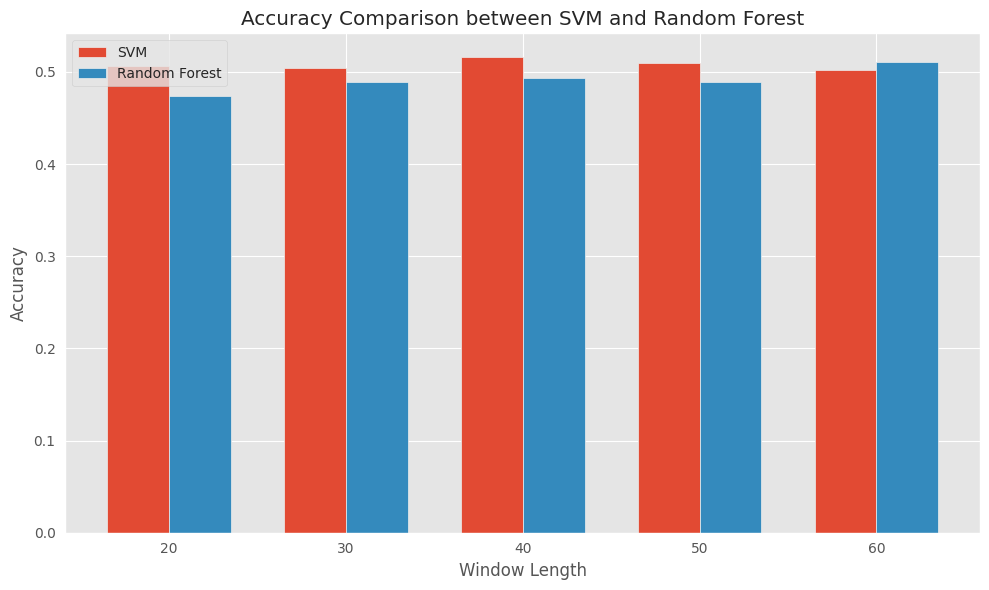

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already executed both train_and_test functions for SVM and Random Forest and collected the accuracies

# Collect accuracies from SVM and Random Forest
svm_accuracies = [np.mean(accurarys[window_length]) for window_length in window_lengths]
rf_accuracies = [np.mean(accuracies[window_length]) for window_length in window_lengths]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(window_lengths))

svm_bars = plt.bar(index, svm_accuracies, bar_width, label='SVM')
rf_bars = plt.bar(index + bar_width, rf_accuracies, bar_width, label='Random Forest')

plt.xlabel('Window Length')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between SVM and Random Forest')
plt.xticks(index + bar_width / 2, window_lengths)
plt.legend()

plt.tight_layout()
plt.show()


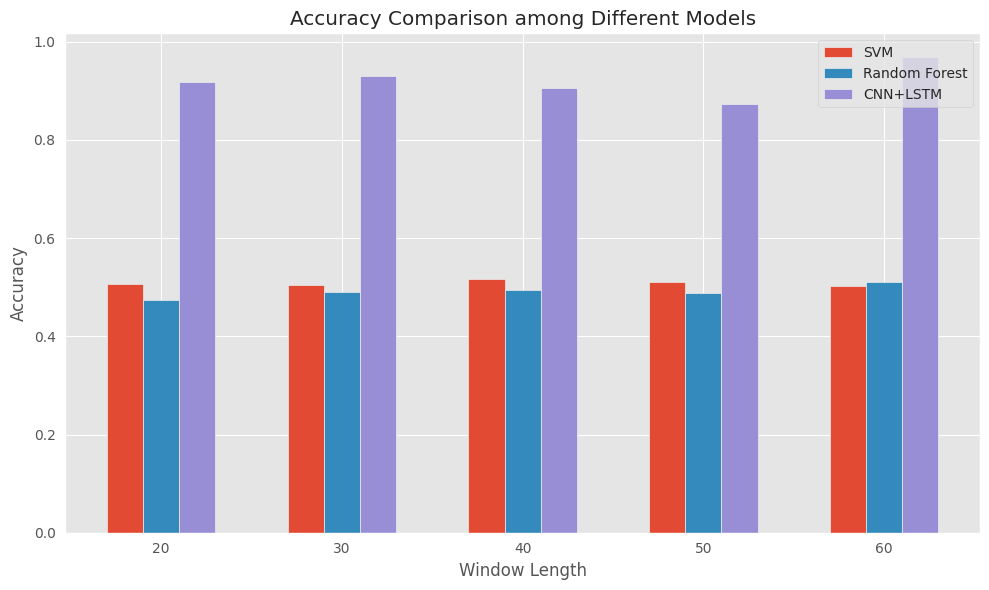

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have collected accuracies for SVM, Random Forest, and CNN+LSTM models

# Collect accuracies for all models

# SVM accuracies
svm_accuracies = [np.mean(accurarys[window_length]) for window_length in window_lengths]

# Random Forest accuracies
rf_accuracies = [np.mean(accuracies[window_length]) for window_length in window_lengths]

# CNN+LSTM accuracies
cnn_lstm_accuracies = [np.mean(metrics[window_length]['R2 Score']) for window_length in window_lengths]

# Plotting the bar graph
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(window_lengths))

svm_bars = plt.bar(index, svm_accuracies, bar_width, label='SVM')
rf_bars = plt.bar(index + bar_width, rf_accuracies, bar_width, label='Random Forest')
cnn_lstm_bars = plt.bar(index + 2 * bar_width, cnn_lstm_accuracies, bar_width, label='CNN+LSTM')

plt.xlabel('Window Length')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison among Different Models')
plt.xticks(index + bar_width, window_lengths)
plt.legend()

plt.tight_layout()
plt.show()


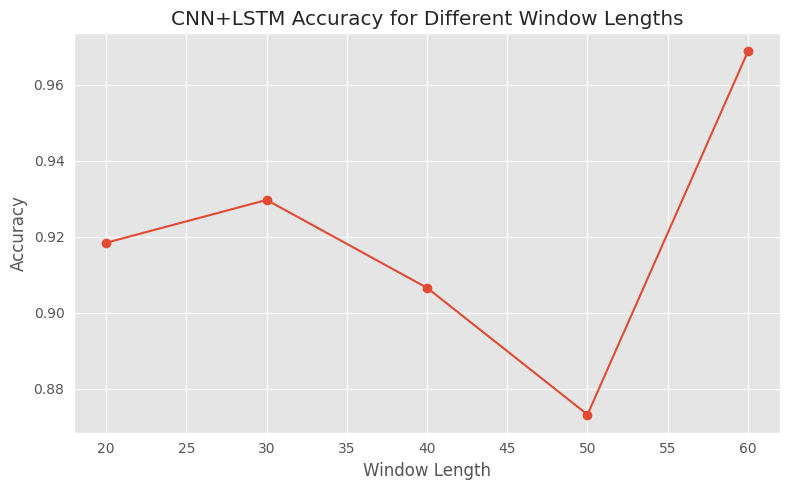

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have collected accuracies for CNN+LSTM models

# CNN+LSTM accuracies
cnn_lstm_accuracies = [np.mean(metrics[window_length]['R2 Score']) for window_length in window_lengths]

# Plotting the accuracy points for CNN+LSTM model
plt.figure(figsize=(8, 5))

plt.plot(window_lengths, cnn_lstm_accuracies, marker='o', linestyle='-')
plt.xlabel('Window Length')
plt.ylabel('Accuracy')
plt.title('CNN+LSTM Accuracy for Different Window Lengths')

plt.grid(True)
plt.tight_layout()
plt.show()
